 # Dataset Introduction

 ## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss


 ## Initializations

In [2]:
np.random.seed(19)
cpu_data_exists = False
mem_data_exists = False


In [3]:
if not cpu_data_exists:
    cpu_data = np.load('google-cpu-full.npy')
    np.random.shuffle(cpu_data)
cpu_data_exists = True


In [4]:
if not mem_data_exists:
    mem_data = np.load('google-mem-full.npy')
    np.random.shuffle(mem_data)
mem_data_exists = True


 There are 12476 machines, each with 8351 datapoints.

In [5]:
print(cpu_data.shape)
print(mem_data.shape)

assert cpu_data.shape == mem_data.shape

no_of_machines = cpu_data.shape[0]
no_of_timestamps = cpu_data.shape[1]


(12476, 8351)
(12476, 8351)


 We take a subsample of the machines. The dataset in its entirety is extremely
 large so for basic exploratory analysis it would burden us with too much
 computing workload without providing any further insight that is of
 significance.

In [6]:
spatial_sample_size = 200
cpu_spatial_sample = cpu_data[:spatial_sample_size]
mem_spatial_sample = mem_data[:spatial_sample_size]

cpu_spatial_correlations = np.empty(
    (spatial_sample_size, spatial_sample_size-1))
mem_spatial_correlations = np.empty(
    (spatial_sample_size, spatial_sample_size-1))
spatial_correlations = {
    'CPU': cpu_spatial_correlations, 'MEM': mem_spatial_correlations}


In [7]:
temporal_sample_size = 200
cpu_temporal_sample = cpu_data[:temporal_sample_size]
mem_temporal_sample = mem_data[:temporal_sample_size]

cpu_temporal_correlations = np.empty(
    (temporal_sample_size, 2*no_of_timestamps-1))
mem_temporal_correlations = np.empty(
    (temporal_sample_size, 2*no_of_timestamps-1))
temporal_correlations = {
    'CPU': cpu_temporal_correlations, 'MEM': mem_temporal_correlations}


 We will be focusing on cpu and memory usage data.

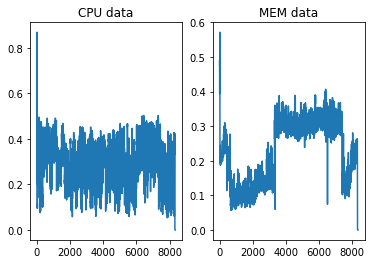

In [8]:
plt.subplot(121).plot(cpu_data[0])
plt.title('CPU data')
plt.subplot(122).plot(mem_data[0])
plt.title('MEM data')
plt.show()


 ## Exploratory Analysis

In [9]:
def ccf(x, y, no_lag=False):
    '''Normalized cross-correlation function,
    similar to ccf in the R language.
    
    Parameters:
    x -- first time series
    y --  second time series
    
    Optional:
    no_lag -- False by default. If true, return a list with every time-shift
        possible instead.
    
    Returns:
        A float with 0 time-shift or a list of floats that represent the
        cross-correlation for every possible time-shift.
    '''
    if np.std(y) * np.std(x) == 0:
        return 0
    else:
        correlation = (
            np.correlate(y - np.mean(y), x - np.mean(x))
            if no_lag else ss.correlate(y - np.mean(y), x - np.mean(x)))
        return correlation / (np.std(y) * np.std(x) * len(y))


 ### Spatial Correlation

 Calculate the spatial correlation between every possible pair of machines
 in our subsample. Do not include any time-shift. Do not include a machine's
 correlation with itself (by definition this will be 1).

In [10]:
for i in range(spatial_sample_size):
    k=0
    for j in range(spatial_sample_size):
        #If the first and second machine are the same one, skip.
        if i != j:
            machine_x = cpu_spatial_sample[i]
            machine_y = cpu_spatial_sample[j]
            cpu_spatial_correlations[i, k] = ccf(machine_x,
                                                 machine_y,
                                                 no_lag=True)
            machine_x = mem_spatial_sample[i]
            machine_y = mem_spatial_sample[j]
            mem_spatial_correlations[i, k] = ccf(machine_x,
                                                 machine_y,
                                                 no_lag=True)
            k += 1
    i += 1


 Have a look at how high the spatial correlation values seem to be.

In [0]:
i = 1
for correlations in spatial_correlations:
    corr = spatial_correlations[correlations]
    abs_correlations = np.abs(corr)
    print(correlations, 'Maximum:', np.amax(corr))
    print(correlations, 'Minimum:', np.amin(corr))
    print(correlations, 'Average:', np.average(corr))
    print(correlations, 'RMS:', np.sqrt(np.mean(abs_correlations)))
    values, base = np.histogram(corr, bins=[n/100 for n in range(-85, 99)])

    ax0 = plt.subplot(len(spatial_correlations), 1, i)
    ax0.plot(base[:-1], values)
    ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(base[:-1], np.cumsum(values), '-',
             2*[np.average(corr)], [0, 40000], '--')
    plt.xticks([n/4 for n in range (-2, 4)])
    plt.title(correlations + ' Spatial Correlations')
    i += 1

plt.tight_layout()
plt.show()


In [0]:
for i in range(spatial_sample_size):
    k=0
    for j in range(spatial_sample_size):
        #If the first and second machine are the same one, skip.
        if i != j:
            machine_x = cpu_spatial_sample[i]
            machine_y = cpu_spatial_sample[j]
            index = len(machine_x)//2
            machine_x = machine_x[index:]
            machine_y = machine_y[index:]
            cpu_spatial_correlations[i, k] = ccf(machine_x,
                                                 machine_y,
                                                 no_lag=True)
            machine_x = mem_spatial_sample[i]
            machine_y = mem_spatial_sample[j]
            machine_x = machine_x[index:]
            machine_y = machine_y[index:]
            mem_spatial_correlations[i, k] = ccf(machine_x,
                                                 machine_y,
                                                 no_lag=True)
            k += 1
    i += 1


In [0]:
i = 1
for correlations in spatial_correlations:
    corr = spatial_correlations[correlations]
    abs_correlations = np.abs(corr)
    print(correlations, 'Maximum:', np.amax(corr))
    print(correlations, 'Minimum:', np.amin(corr))
    print(correlations, 'Average:', np.average(corr))
    print(correlations, 'RMS:', np.sqrt(np.mean(abs_correlations)))
    values, base = np.histogram(corr, bins=[n/100 for n in range(-85, 101)])

    ax0 = plt.subplot(len(spatial_correlations), 1, i)
    ax0.plot(base[:-1], values)
    ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(base[:-1], np.cumsum(values), '-',
             2*[np.average(corr)], [0, 40000], '--')
    plt.xticks([n/4 for n in range (-2, 6)])
    plt.title(correlations + ' Spatial Correlations')
    i += 1

plt.tight_layout()
plt.show()


 ### Temporal Correlation

 Calculate the temporal correlation of each time series with itself,
 at every possible time-shift.

In [0]:
for i in range(temporal_sample_size):
    cpu_temporal_correlations[i] = ccf(
        cpu_temporal_sample[i],
        cpu_temporal_sample[i])
    mem_temporal_correlations[i] = ccf(
        mem_temporal_sample[i],
        mem_temporal_sample[i])


 Have a look at the average temporal correlation for each time shift.

In [0]:
i = 1
zero_shift_timestamp = no_of_timestamps-1
days_to_minutes = 24*60
daily_vertical_range = [0, 1]
weekly_vertical_range = [-0.1, 0.5]
for correlations in temporal_correlations:
    avg_correlation = np.average(temporal_correlations[correlations], axis=0)

    # Demonstrate daily periodicity.

    # One unit of time equals 5 minutes.
    time_window = (
        zero_shift_timestamp - 4 * days_to_minutes // 5,
        zero_shift_timestamp + 4 * days_to_minutes // 5)
    plt.subplot(len(temporal_correlations), 2, i).plot(
        # One unit of time equals 5 minutes.
        [5 * (x - zero_shift_timestamp) / days_to_minutes
         for x in range(len(avg_correlation))][time_window[0]:time_window[1]],
        avg_correlation[time_window[0]:time_window[1]], '-',
        # zero time-shift
        2*[0], daily_vertical_range, '--',
        # +/- a few days
        2*[1], daily_vertical_range, '--',
        2*[-1], daily_vertical_range, '--',
        2*[2], daily_vertical_range, '--',
        2*[-2], daily_vertical_range, '--',
        2*[3], daily_vertical_range, '--',
        2*[-3], daily_vertical_range, '--')
    plt.title(correlations + ' Daily Periodicity')
    plt.xlabel('Time-shift (Days)')
    plt.ylabel('Cross-correlation')
    i += 1
    
    # Demonstrate weekly periodicity.

    # One unit of time equals 5 minutes.
    time_window = (
        zero_shift_timestamp - 4 * 7 * days_to_minutes // 5,
        zero_shift_timestamp + 4 * 7 * days_to_minutes // 5)
    smoothed = ss.medfilt(avg_correlation, kernel_size=249)
    plt.subplot(len(temporal_correlations), 2, i).plot(
        # One unit of time equals 5 minutes.
        [5 * (x - zero_shift_timestamp) / (7 * days_to_minutes)
         for x in range(len(smoothed))][time_window[0]:time_window[1]],
        smoothed[time_window[0]:time_window[1]], '-',
        # zero time-shift
        2*[0], weekly_vertical_range, '--',
        # +/- a few weeks
        2*[1], weekly_vertical_range, '--',
        2*[-1], weekly_vertical_range, '--',
        2*[2], weekly_vertical_range, '--',
        2*[-2], weekly_vertical_range, '--',
        2*[3], weekly_vertical_range, '--',
        2*[-3], weekly_vertical_range, '--')
    plt.title(correlations + ' Weekly Periodicity')
    plt.xlabel('Time-shift (Weeks)')
    plt.ylabel('Cross-correlation')
    i += 1

plt.tight_layout()
plt.show()


In [0]:
for correlations in temporal_correlations:
    avg_correlation = np.average(temporal_correlations[correlations], axis=0)
    print(correlations, 'Average Correlation:', np.average(avg_correlation))
    print(correlations, 'RMS Correlation:',
          np.sqrt(np.mean(avg_correlation**2)))
    plt.hist(avg_correlation, bins=[n/10 for n in range(-10, 11)])
    plt.title(correlations + ' Temporal Correlations')
    plt.show()


In [0]:
for correlations in temporal_correlations:
    avg_correlation = np.average(temporal_correlations[correlations], axis=0)
    daily_timestamps = (
        [zero_shift_timestamp + n * days_to_minutes // 5 for n in range(-1, 2)])
    daily_timestamps = daily_timestamps[:1] + daily_timestamps [2:]
    daily_corr = np.array(
        [avg_correlation[timestamp] for timestamp in daily_timestamps])
        
    print(correlations, 'Average Correlation:', np.average(daily_corr))
    print(correlations, 'RMS Correlation:',
          np.sqrt(np.mean(daily_corr**2)))
    plt.hist(daily_corr, bins=[n/10 for n in range(-10, 11)])
    plt.title(correlations + ' Temporal Correlations')
    plt.show()

